<a href="https://colab.research.google.com/github/nameera-khan/nameera-khan/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d dansbecker/aer-credit-card-data
# Unzip dataset
!unzip soccer.zip -d ./soccer

# Verify files
import os
print(os.listdir('./soccer'))

# SQLite file path
database_path = './soccer/database.sqlite'
print("Database file path:", database_path)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/aer-credit-card-data")

print("Path to dataset files:", path)

100%|██████████| 23.6k/23.6k [00:00<00:00, 9.66MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/aer-credit-card-data/versions/1


In [ ]:
import os
# Path to the downloaded dataset directory
path = kagglehub.dataset_download("dansbecker/aer-credit-card-data")

# Find the CSV file in the directory
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]  # Assuming there's at least one CSV file

# Full path to the CSV file
csv_path = os.path.join(path, csv_file)

# Load CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [ ]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB



Summary Statistics:
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.

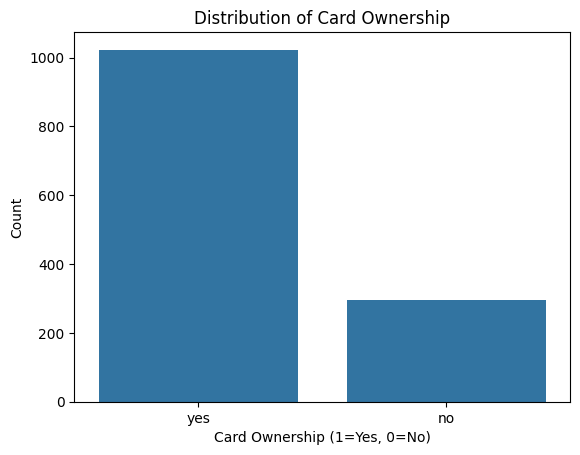

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of 'card' (target variable)
sns.countplot(x='card', data=df)
plt.title('Distribution of Card Ownership')
plt.xlabel('Card Ownership (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

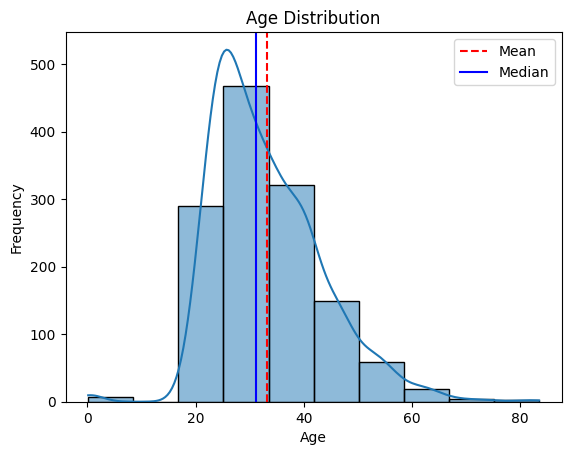

In [ ]:
# Age distribution
sns.histplot(df['age'], kde=True, bins=10)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='b', linestyle='-', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
yes_no = {'yes':1, 'no':0}
df['card'] = df['card'].map(yes_no)
df['owner'] = df['owner'].map(yes_no)
df['selfemp'] = df['selfemp'].map(yes_no)

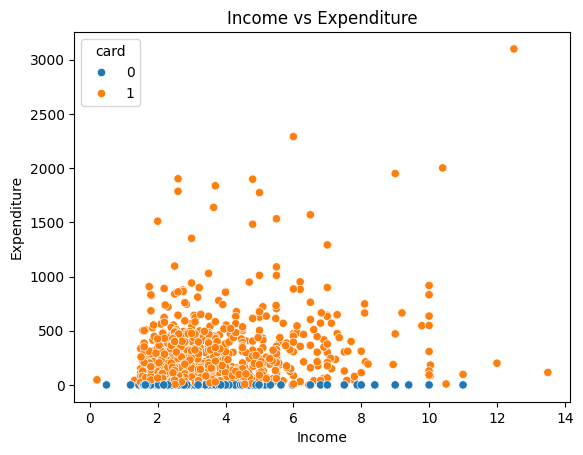

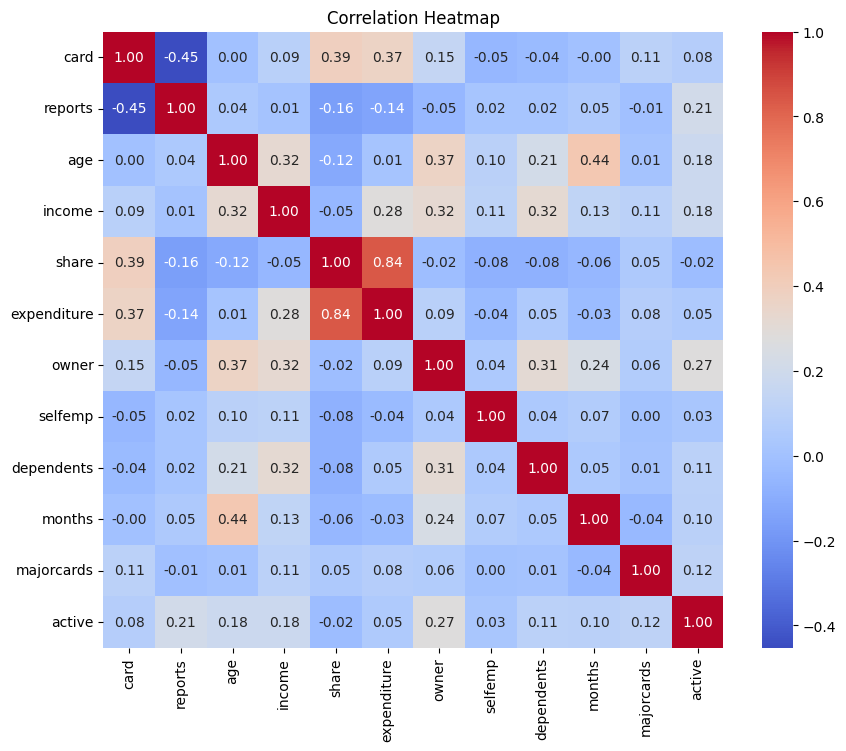

In [ ]:
# Income vs. Expenditure
sns.scatterplot(x='income', y='expenditure', hue='card', data=df)
plt.title('Income vs Expenditure')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


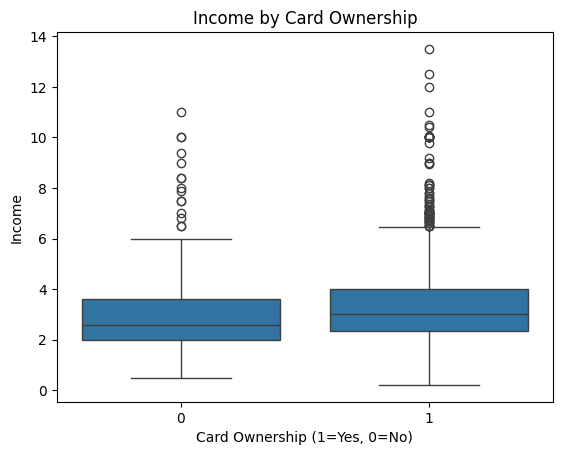

In [ ]:
# Boxplot for income by card ownership
sns.boxplot(x='card', y='income', data=df)
plt.title('Income by Card Ownership')
plt.xlabel('Card Ownership (1=Yes, 0=No)')
plt.ylabel('Income')
plt.show()

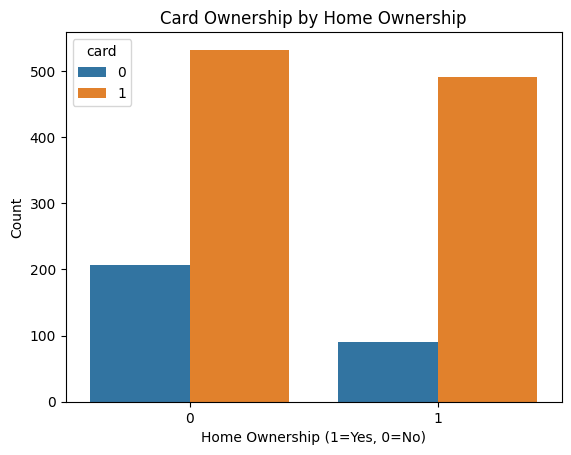

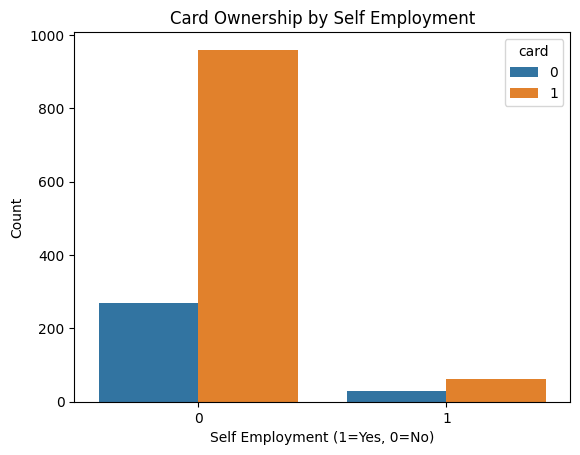

In [ ]:
# Analyzing categorical variables (owner and self-employed)
sns.countplot(x='owner', hue='card', data=df)
plt.title('Card Ownership by Home Ownership')
plt.xlabel('Home Ownership (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='selfemp', hue='card', data=df)
plt.title('Card Ownership by Self Employment')
plt.xlabel('Self Employment (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

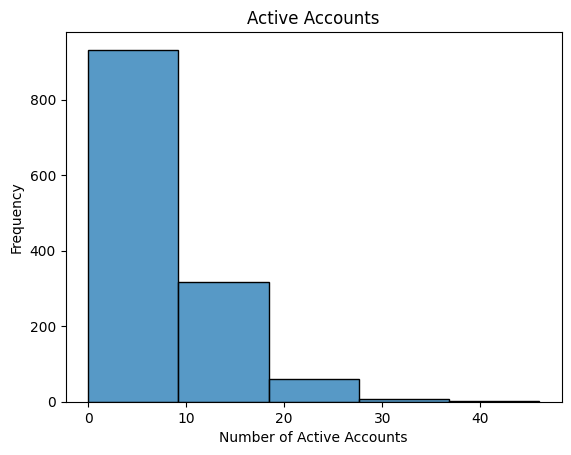

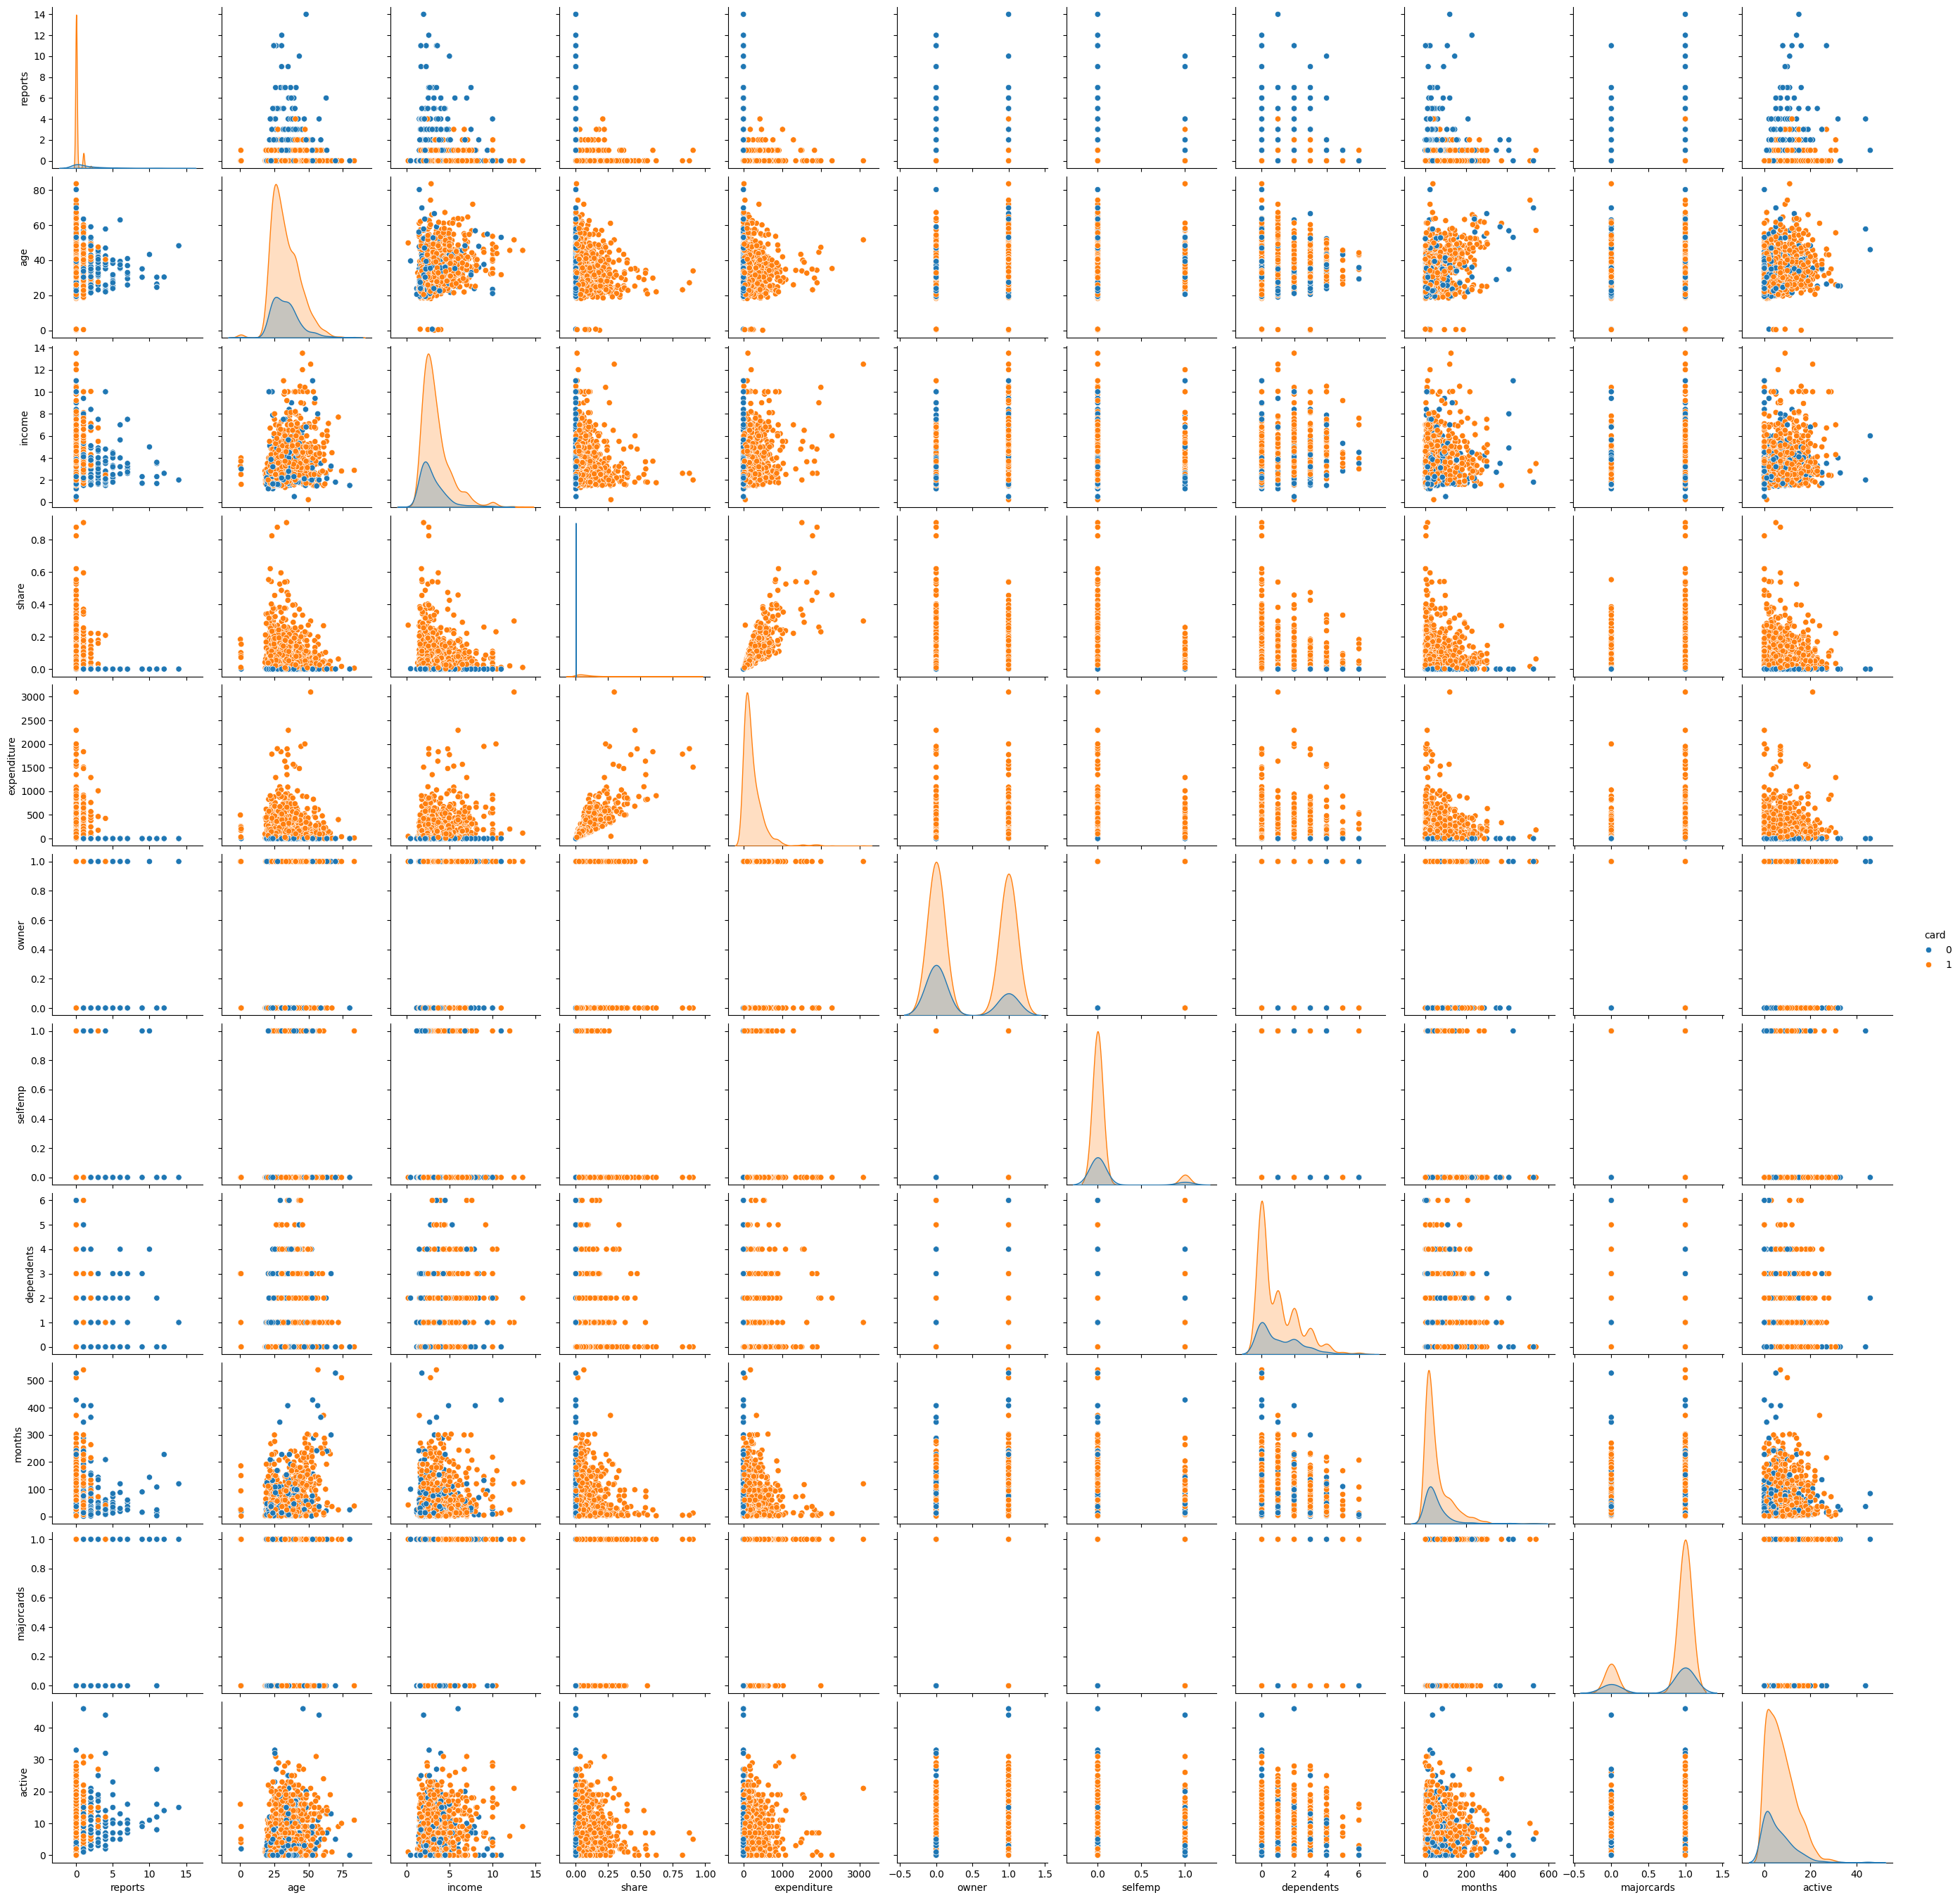


Insights:
1. Distribution of card ownership shows class balance/imbalance.
2. Age and income distributions reveal the demographics of the dataset.
3. Correlation heatmap identifies relationships between numeric variables.
4. Scatterplot and boxplots highlight relationships and outliers.


In [ ]:
# Exploring active accounts
sns.histplot(df['active'], kde=False, bins=5)
plt.title('Active Accounts')
plt.xlabel('Number of Active Accounts')
plt.ylabel('Frequency')
plt.show()

# Pairplot for visualizing pairwise relationships
sns.pairplot(df, hue='card', diag_kind='kde')
plt.show()

# Insights summary
print("\nInsights:")
print("1. Distribution of card ownership shows class balance/imbalance.")
print("2. Age and income distributions reveal the demographics of the dataset.")
print("3. Correlation heatmap identifies relationships between numeric variables.")
print("4. Scatterplot and boxplots highlight relationships and outliers.")


In [ ]:
# Create income_per_dependents variable
df['income_per_dependents'] = df['income'] / (df['dependents'].replace(0, 1))


In [ ]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,income_per_dependents
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1.506667
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,0.806667
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1.125000
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,2.540000
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,4.893350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19,4.566000
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5,1.064000
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2,2.300000
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7,3.700000


## Model prediction

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['card'])  # Features
y = df['card']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]


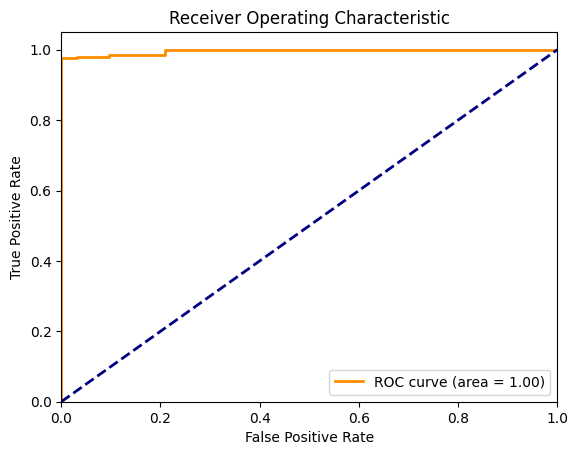

In [ ]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df.card.value_counts()

,count
card,
1,1023
0,296


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        62
           1       1.00      0.97      0.98       202

    accuracy                           0.98       264
   macro avg       0.96      0.99      0.97       264
weighted avg       0.98      0.98      0.98       264



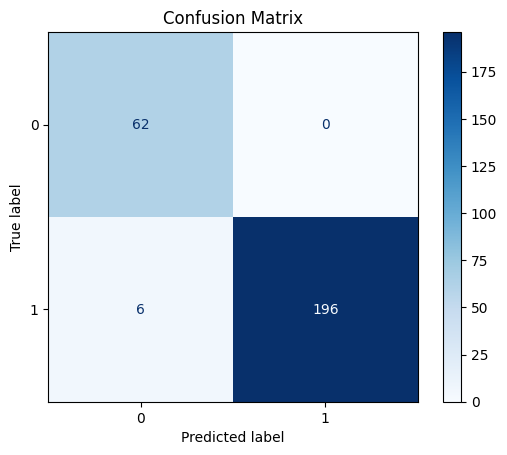

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

- Precision (0.91): Of all predictions made as 0, 91% were correct.
- Recall (1.00): The model identified all instances of 0 correctly (no false negatives).

Class 1:

Precision (1.00): All predictions made as 1 were correct.
Recall (0.97): The model identified 97% of actual 1 instances correctly.
F1-Score (0.98): The balance between precision and recall for class 1.